In [188]:
import json
import os
import copy
import numpy as np
import pandas as pd
from tqdm import tqdm
import time
import sys
sys.path.append("../")

from cfmining.algorithms import MAPOFCEM, BruteForce, MAPOCAM
from cfmining.criteria import PercentileCalculator, PercentileCriterion, PercentileChangesCriterion, NonDomCriterion
from cfmining.predictors import GeneralClassifier_Shap, GeneralClassifier
from cfmining.action_set import ActionSet
from cfmining.utils import get_data_model
import matplotlib.pyplot as plt

import dice_ml


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [189]:
X_train, Y_train, model, outlier_detection, individuals = get_data_model("german_small")

In [217]:
model_shap = GeneralClassifier_Shap(model, outlier_detection, X_train, tree = True, threshold = 0)
model_shap.shap_max

array([0.        , 0.01365026, 0.11416252, 0.22304552, 0.18693113,
       0.14371622, 0.07270977, 0.03069115, 0.01640287, 0.02455906,
       0.01580254, 0.04732715, 0.        , 0.        , 0.06944223,
       0.        , 0.14545303, 0.01136599, 0.        , 0.02190289,
       0.06922532, 0.01949041, 0.        , 0.03469487, 0.08071697,
       0.03771966, 0.04938995])

In [218]:
prob_max_ = []
estimated_prob_max_ = []
for i in range(100):
    model_shap.clear_cache()
    open_vars = np.random.randint(0, X_train.shape[1], 2).tolist()

    solution = X_train.sample(1).values[0]
    model_shap.set_pivot(solution)
    
    # select some random fixed vars
    fixed_vars = [k for k in range(X_train.shape[1]) if k not in open_vars]
    
    # change values 
    for k in fixed_vars:
        solution[k] = np.random.choice(X_train.iloc[:, k].unique())


    
    
    prob_max = model_shap.predict_max(solution, open_vars)
    estimated_prob_max = model_shap.estimate_predict_max(solution, open_vars)
    prob_max_.append(prob_max)
    estimated_prob_max_.append(estimated_prob_max)

    print(f"Prob Max: {prob_max:.2f}, Estimated Prob Max: {estimated_prob_max:.2f}")
          

Prob Max: 0.63, Estimated Prob Max: 0.65
Prob Max: 0.45, Estimated Prob Max: 0.45
Prob Max: 0.18, Estimated Prob Max: 0.16
Prob Max: 0.85, Estimated Prob Max: 0.87
Prob Max: 0.72, Estimated Prob Max: 0.69
Prob Max: 0.96, Estimated Prob Max: 0.91
Prob Max: 0.84, Estimated Prob Max: 0.81
Prob Max: 0.64, Estimated Prob Max: 0.64
Prob Max: 0.84, Estimated Prob Max: 0.84
Prob Max: 0.44, Estimated Prob Max: 0.44
Prob Max: 1.05, Estimated Prob Max: 1.05
Prob Max: 1.02, Estimated Prob Max: 0.95
Prob Max: 0.91, Estimated Prob Max: 0.92
Prob Max: 0.42, Estimated Prob Max: 0.41
Prob Max: 1.06, Estimated Prob Max: 1.09
Prob Max: 0.40, Estimated Prob Max: 0.36
Prob Max: 0.94, Estimated Prob Max: 0.94
Prob Max: 0.82, Estimated Prob Max: 0.80
Prob Max: 0.56, Estimated Prob Max: 0.56
Prob Max: 0.78, Estimated Prob Max: 0.78
Prob Max: 1.03, Estimated Prob Max: 0.98
Prob Max: 0.35, Estimated Prob Max: 0.34
Prob Max: 0.56, Estimated Prob Max: 0.56
Prob Max: 0.70, Estimated Prob Max: 0.71
Prob Max: 0.46, 

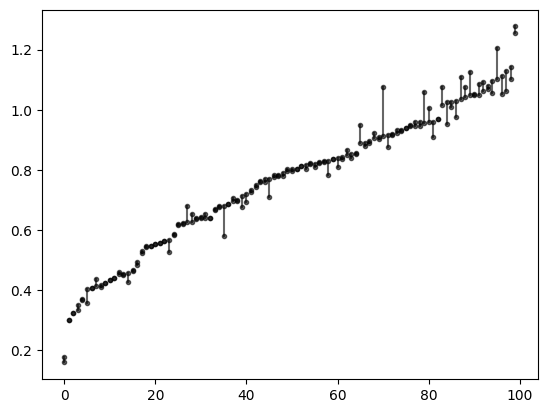

In [219]:
idx = np.argsort(prob_max_)
prob_max_ = np.array(prob_max_)[idx]
estimated_prob_max_ = np.array(estimated_prob_max_)[idx]

for i in range(100):
    plt.plot(
        [i, i], [prob_max_[i], estimated_prob_max_[i]],
        color="black",
        alpha = 0.6,
        marker = "."
    )

In [220]:
X_train, Y_train, model, outlier_detection, individuals = get_data_model("german")

In [221]:
model_shap = GeneralClassifier_Shap(model, outlier_detection, X_train, tree = True, threshold = 0)
model_shap.shap_max

array([0.        , 0.0138123 , 0.10933474, 0.20880539, 0.17004417,
       0.11663637, 0.07806706, 0.03615949, 0.01381228, 0.03150562,
       0.01574866, 0.05279045, 0.        , 0.        , 0.07655152,
       0.        , 0.18593127, 0.00685046, 0.        , 0.02733715,
       0.0680617 , 0.01432627, 0.        , 0.03063277, 0.06230402,
       0.02763835, 0.04625276])

In [222]:
prob_max_ = []
estimated_prob_max_ = []
for i in range(100):
    model_shap.clear_cache()
    # select random open vars
    open_vars = np.random.randint(0, X_train.shape[1], 10).tolist()

    # select 3 fixed vars to change values
    fixed_vars = [k for k in range(X_train.shape[1]) if k not in open_vars]
    fixed_vars = np.random.choice(fixed_vars, 3, replace = False)
    
    # pick individual and set pivot
    solution = X_train.sample(1).values[0]
    model_shap.set_pivot(solution)
    
    
    # change values to get a solution
    for k in fixed_vars:
        solution[k] = np.random.choice(X_train.iloc[:, k].unique())

    
    prob_max = model_shap.predict_max(solution, open_vars)
    estimated_prob_max = model_shap.estimate_predict_max(solution, open_vars)
    prob_max_.append(prob_max)
    estimated_prob_max_.append(estimated_prob_max)

    print(f"Prob Max: {prob_max:.2f}, Estimated Prob Max: {estimated_prob_max:.2f}")
          

Prob Max: 1.35, Estimated Prob Max: 1.34
Prob Max: 1.21, Estimated Prob Max: 1.21
Prob Max: 1.63, Estimated Prob Max: 1.61
Prob Max: 1.10, Estimated Prob Max: 0.96
Prob Max: 1.16, Estimated Prob Max: 1.16
Prob Max: 0.85, Estimated Prob Max: 0.83
Prob Max: 0.77, Estimated Prob Max: 0.77
Prob Max: 1.15, Estimated Prob Max: 1.09
Prob Max: 1.08, Estimated Prob Max: 1.13
Prob Max: 0.91, Estimated Prob Max: 0.91
Prob Max: 1.72, Estimated Prob Max: 1.78
Prob Max: 1.23, Estimated Prob Max: 1.22
Prob Max: 1.34, Estimated Prob Max: 1.34
Prob Max: 1.08, Estimated Prob Max: 1.15
Prob Max: 1.34, Estimated Prob Max: 1.34
Prob Max: 1.24, Estimated Prob Max: 1.33
Prob Max: 1.11, Estimated Prob Max: 1.13
Prob Max: 1.36, Estimated Prob Max: 1.39
Prob Max: 1.23, Estimated Prob Max: 1.22
Prob Max: 1.04, Estimated Prob Max: 1.04
Prob Max: 1.25, Estimated Prob Max: 1.25
Prob Max: 1.08, Estimated Prob Max: 1.12
Prob Max: 1.15, Estimated Prob Max: 1.24
Prob Max: 1.20, Estimated Prob Max: 1.20
Prob Max: 0.90, 

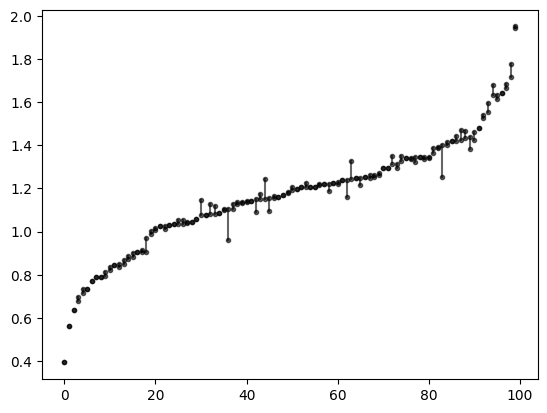

In [223]:
idx = np.argsort(prob_max_)
prob_max_ = np.array(prob_max_)[idx]
estimated_prob_max_ = np.array(estimated_prob_max_)[idx]

for i in range(100):
    plt.plot(
        [i, i], [prob_max_[i], estimated_prob_max_[i]],
        color="black",
        alpha = 0.6,
        marker = "."
    )

In [224]:
model_shap = GeneralClassifier_Shap(model, outlier_detection, X_train, tree = False, threshold = 0)
model_shap.shap_max

array([0.5       , 0.51632484, 0.68377329, 0.78119357, 0.79355594,
       0.63757512, 0.63477474, 0.56154098, 0.52322028, 0.52823191,
       0.51327194, 0.56902303, 0.5       , 0.5       , 0.62159138,
       0.5       , 0.70996739, 0.50936013, 0.5       , 0.53428884,
       0.57097557, 0.51860921, 0.5       , 0.54479689, 0.576437  ,
       0.53716929, 0.56542569])

In [225]:
prob_max_ = []
estimated_prob_max_ = []
for i in range(100):
    model_shap.clear_cache()
    # select random open vars
    open_vars = np.random.randint(0, X_train.shape[1], 10).tolist()

    # select 3 fixed vars to change values
    fixed_vars = [k for k in range(X_train.shape[1]) if k not in open_vars]
    fixed_vars = np.random.choice(fixed_vars, 3, replace = False)
    
    # pick individual and set pivot
    solution = X_train.sample(1).values[0]
    model_shap.set_pivot(solution)
    
    
    # change values to get a solution
    for k in fixed_vars:
        solution[k] = np.random.choice(X_train.iloc[:, k].unique())

    
    prob_max = model_shap.predict_max(solution, open_vars)
    estimated_prob_max = model_shap.estimate_predict_max(solution, open_vars)
    prob_max_.append(prob_max)
    estimated_prob_max_.append(estimated_prob_max)

    print(f"Prob Max: {prob_max:.2f}, Estimated Prob Max: {estimated_prob_max:.2f}")
          

Prob Max: 1.46, Estimated Prob Max: 1.46
Prob Max: 1.31, Estimated Prob Max: 1.48
Prob Max: 1.56, Estimated Prob Max: 1.56
Prob Max: 1.73, Estimated Prob Max: 1.73
Prob Max: 1.42, Estimated Prob Max: 1.42
Prob Max: 1.46, Estimated Prob Max: 1.47
Prob Max: 1.82, Estimated Prob Max: 1.91
Prob Max: 1.72, Estimated Prob Max: 1.80
Prob Max: 1.80, Estimated Prob Max: 1.81
Prob Max: 1.54, Estimated Prob Max: 1.58
Prob Max: 2.11, Estimated Prob Max: 2.14
Prob Max: 1.06, Estimated Prob Max: 1.08
Prob Max: 1.26, Estimated Prob Max: 1.29
Prob Max: 1.62, Estimated Prob Max: 1.62
Prob Max: 1.41, Estimated Prob Max: 1.61
Prob Max: 1.44, Estimated Prob Max: 1.47
Prob Max: 1.22, Estimated Prob Max: 1.22
Prob Max: 1.65, Estimated Prob Max: 1.61
Prob Max: 1.76, Estimated Prob Max: 1.78
Prob Max: 1.33, Estimated Prob Max: 1.33
Prob Max: 1.68, Estimated Prob Max: 1.69
Prob Max: 2.09, Estimated Prob Max: 2.08
Prob Max: 1.88, Estimated Prob Max: 1.81
Prob Max: 2.00, Estimated Prob Max: 2.02
Prob Max: 1.68, 

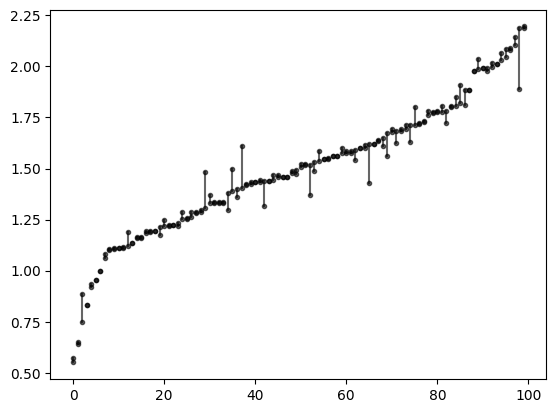

In [226]:
idx = np.argsort(prob_max_)
prob_max_ = np.array(prob_max_)[idx]
estimated_prob_max_ = np.array(estimated_prob_max_)[idx]

for i in range(100):
    plt.plot(
        [i, i], [prob_max_[i], estimated_prob_max_[i]],
        color="black",
        alpha = 0.6,
        marker = "."
    )